# Process all data with 3C 279 or Geminga

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### Geminga: load data

In [2]:
%%time 
self = main.Main('Geminga',  interval=5, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
CPU times: user 1min 13s, sys: 15.3 s, total: 1min 29s
Wall time: 1min 21s


#### Create a BinnedWeights object with all data, check it

Binning: 730 intervals of 5 days from 54683.00 to 58333.00


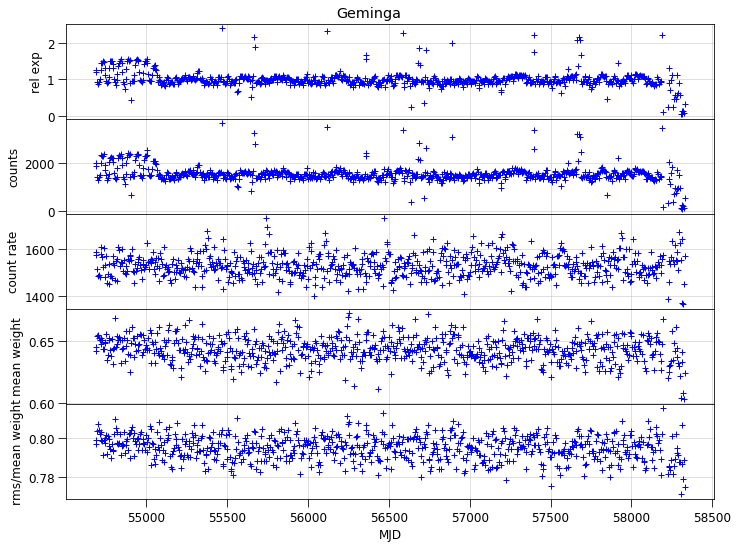

In [3]:
bw=self.binned_weights()
bw.test_plots();

#### Now pass that to the LightCurve class, which does fitting

In [4]:
lc = light_curve.LightCurve(bw); 
%time lc.fit(fix_beta=False)

Loaded 715 / 730 cells with exposure > 0.3 for light curve analysis
Fits: 715 good, 0 failed 
CPU times: user 1.65 s, sys: 2 ms, total: 1.65 s
Wall time: 1.65 s


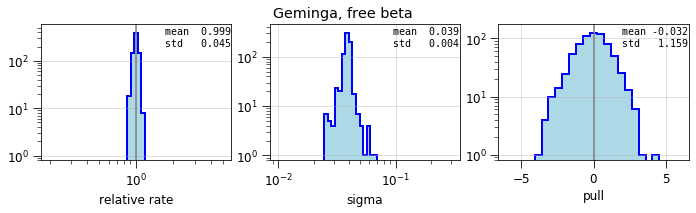

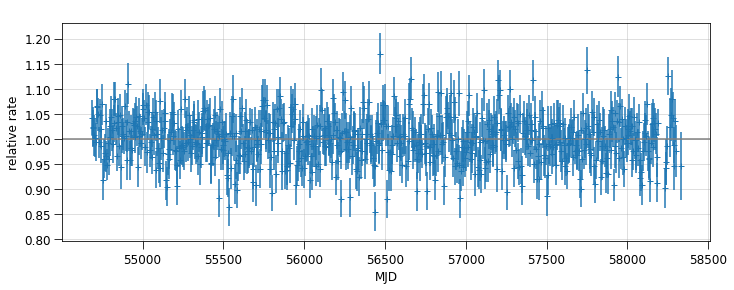

In [5]:
lc.fit_hists(title='Geminga, free beta')
lc.rate_plot(title=' ')

### Fit with fixed beta
(as in Fig 1)

In [6]:
%time lc.fit(fix_beta=True)

Fits: 715 good, 0 failed 
CPU times: user 563 ms, sys: 2 ms, total: 565 ms
Wall time: 572 ms


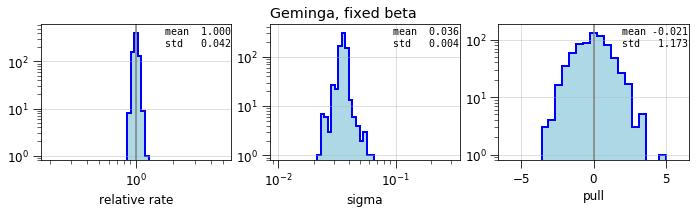

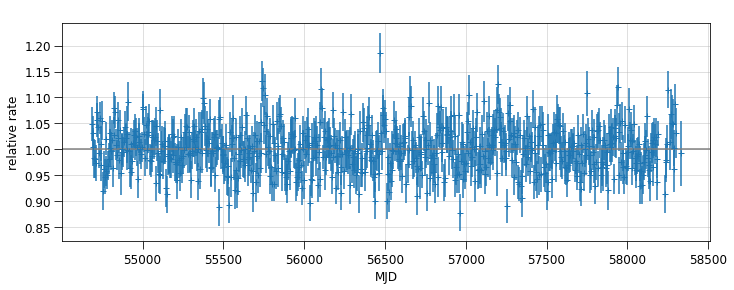

In [7]:
lc.fit_hists(title = 'Geminga, fixed beta')
lc.rate_plot(title=' ')